In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

PATH_READ_BOUND = '123181_train_raw.csv'
PATH_READ_STOCK = '301085_train_raw.csv'

# df = pd.read_csv(PATH_READ, index_col='Timestamp')
bound = pd.read_csv(PATH_READ_BOUND, index_col='Timestamp')
stock = pd.read_csv(PATH_READ_STOCK, index_col='Timestamp')

In [17]:
bound['Avg'] = bound['Turnover']/bound['Volume']

nan_rows_Avg = bound[bound['Avg'].isnull()]

# 如遇涨/跌停，直接用高开低收的价格，因为都一样
for index, row in nan_rows_Avg.iterrows():
    if row['High'] == row['Low'] == row['Open'] == row['Close']:
        row['Avg'] = row['High']

bound.update(nan_rows_Avg)

In [18]:
stock['Avg'] = stock['Turnover']/stock['Volume']

nan_rows_Avg = stock[stock['Avg'].isnull()]

# 如遇涨/跌停，直接用高开低收的价格，因为都一样
for index, row in nan_rows_Avg.iterrows():
    if row['High'] == row['Low'] == row['Open'] == row['Close']:
        row['Avg'] = row['High']

stock.update(nan_rows_Avg)

stock.to_csv('stock_temp.csv')

In [19]:
bound['BOUND_Log_Return_Avg_1min'] = np.log(bound['Avg'] / bound['Avg'].shift(1))

stock['STOCK_Log_Return_Avg_1min'] = np.log(stock['Avg'] / stock['Avg'].shift(1))

df = pd.concat([bound['BOUND_Log_Return_Avg_1min'], stock['STOCK_Log_Return_Avg_1min']], axis=1)

print(df)

df.dropna()


                     BOUND_Log_Return_Avg_1min  STOCK_Log_Return_Avg_1min
Timestamp                                                                
2023-06-01 09:26:00                        NaN                        NaN
2023-06-01 09:31:00                  -0.000267                   0.012464
2023-06-01 09:32:00                   0.003864                   0.007106
2023-06-01 09:33:00                  -0.003972                  -0.003104
2023-06-01 09:34:00                   0.008686                   0.012583
...                                        ...                        ...
2023-07-06 14:59:00                        NaN                        NaN
2023-07-06 15:00:00                        NaN                        NaN
2023-07-06 15:01:00                        NaN                        NaN
2023-07-06 15:35:00                        NaN                        NaN
2023-06-15 15:35:00                        NaN                        NaN

[5841 rows x 2 columns]


,BOUND_Log_Return_Avg_1min,STOCK_Log_Return_Avg_1min
Timestamp,,
2023-06-01 09:31:00,-0.000267,0.012464
2023-06-01 09:32:00,0.003864,0.007106
2023-06-01 09:33:00,-0.003972,-0.003104
2023-06-01 09:34:00,0.008686,0.012583
2023-06-01 09:35:00,-0.001721,0.001496
...,...,...
2023-07-06 14:54:00,0.000237,-0.000233
2023-07-06 14:55:00,0.003936,-0.000017
2023-07-06 14:56:00,0.000983,0.000083


<Axes: xlabel='BOUND_Log_Return_Avg_1min', ylabel='STOCK_Log_Return_Avg_1min'>

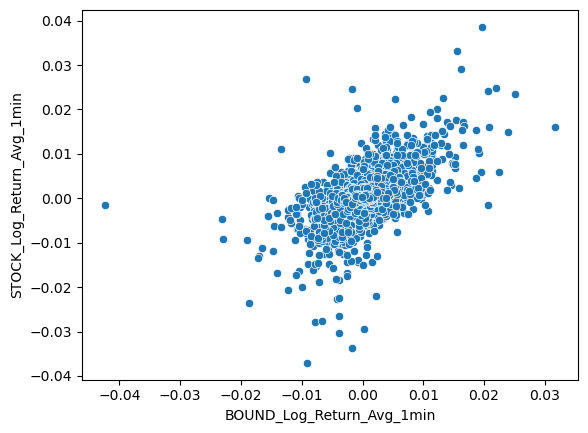

In [21]:
sns.scatterplot(data=df, x='BOUND_Log_Return_Avg_1min', y='STOCK_Log_Return_Avg_1min')

In [25]:
correlation = df['BOUND_Log_Return_Avg_1min'].corr(df['STOCK_Log_Return_Avg_1min'])

print("Corr between: " + str(correlation))

Corr between: 0.5838396102578239
